# Dry Tortugas Example


This notebook loads a paleoclimate dataset from Dry Tortugas National Park (Florida). The series from measurements made on several coral species by [DeLong et al. (2011)](https://www.sciencedirect.com/science/article/pii/S0031018211002501?casa_token=u1x_ZYnm_mIAAAAA:rU7n-8jHh2g5UPgGHs5h1iptBXVa6rfvKFxpOwgMjHgB6g4jUZ9oRppzJz7O5UQHDlc1U3xhYSg)). The first column contains the time information. The rest of the columns contain the actual records and instrumental data used for calibration. 

In [1]:
import pandas as pd # to load the record
import matplotlib.pyplot as plt
import pyleoclim as pyleo #to work with the record
from pathlib import Path

In [2]:
ROOT_DIR = Path().resolve().parent
DATA_DIR = ROOT_DIR.joinpath('data')

tortugas_path = DATA_DIR.joinpath('tortugas2011.xls')
print(tortugas_path)

/Users/julieneg/Documents/GitHub/paleoPandas/data/tortugas2011.xls


## Data loading

Read data into a Pandas DataFrame:

In [3]:
df = pd.read_excel(tortugas_path, sheet_name=1,header=[0,2])
df.head()

Coral    Siderastrea sidera                                       
          Year Mean Sr/Ca (mmol/mol) Number of samples St. error of mean   
0  2008.625000              8.737095                 1          0.012000  \
1  2008.541667              8.770223                 2          0.003228   
2  2008.458333              8.841024                 2          0.003956   
3  2008.375000              8.940933                 2          0.001614   
4  2008.291667              9.022715                 2          0.003125   

                                                                    
  Mean Sr/Ca (mmol/mol).1 Number of samples.1 St. error of mean.1   
0                     NaN                 NaN                 NaN  \
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3                8.972382                 1.0                0.01   
4                9.062088                 1.0                0.01   

  Montastraea faveolata                                       
  Mean Sr/Ca (mmol/mol) Number of samples St. error of mean   
0              9.025385                 3          0.003027  \
1              9.051444                 3          0.010060   
2              9.111843                 3          0.000554   
3              9.190204                 3          0.021459   
4              9.232626                 3          0.010278   

  Monthly mean SST from NDBC www.ndbc.noaa.gov                     
                                 DRTO SST (ºC) St. error of mean   
0                                    30.193011          0.010330  \
1                                    29.551197          0.010570   
2                                    28.539499          0.022829   
3                                    26.642473          0.026493   
4                                    24.905000          0.019899   

                                         
  Sand Key SST (ºC) St. error of mean.1  
0               NaN                 NaN  
1               NaN                 NaN  
2               NaN                 NaN  
3               NaN                 NaN  
4               NaN                 NaN

The following cell will create 5 `pyleoclim.Series` objects:
* One with Siderastrea Sidera Sr/Ca for the first coral head (column 1, 0-index)
* One with Sideratra Sidera Sr/Ca for the second coral head (column 4)
* One with Montrastraea Faveolata Sr/Ca (column 7)
* One for instrumental data (DRTO, column 10)
* One for instrumental data (Sand Key SST, column 12)

In [4]:
ts_ss_1 = pyleo.Series(time=df.iloc[:,0], value=df.iloc[:,1],time_unit='yr CE',value_unit='mmol/mol',
                       time_name='Time', value_name='S. sidera Sr/Ca',label = 'S. sidera head1')
ts_ss_2 = pyleo.Series(time=df.iloc[:,0], value=df.iloc[:,4],time_unit='yr CE',value_unit='mmol/mol',
                       time_name='Time', value_name='S. sidera Sr/Ca',label = 'S. sidera head2')
ts_mf = pyleo.Series(time=df.iloc[:,0], value=df.iloc[:,7],time_unit='yr CE',value_unit='mmol/mol',
                       time_name='Time', value_name='M. faveolata Sr/Ca',label = 'M. faveolata')
ts_drto = pyleo.Series(time=df.iloc[:,0], value=df.iloc[:,10],time_unit='yr CE',value_unit='$^\circ$C',
                       time_name='Time', value_name='Sea Surface Temperature',label = 'DRTO')
ts_sk = pyleo.Series(time=df.iloc[:,0], value=df.iloc[:,12],time_unit='yr CE',value_unit='$^\circ$C',
                       time_name='Time', value_name='Sea Surface Temperature',label = 'Sand Key')

## Plotting

This is how I would plot the three coral records using Matplotlib:

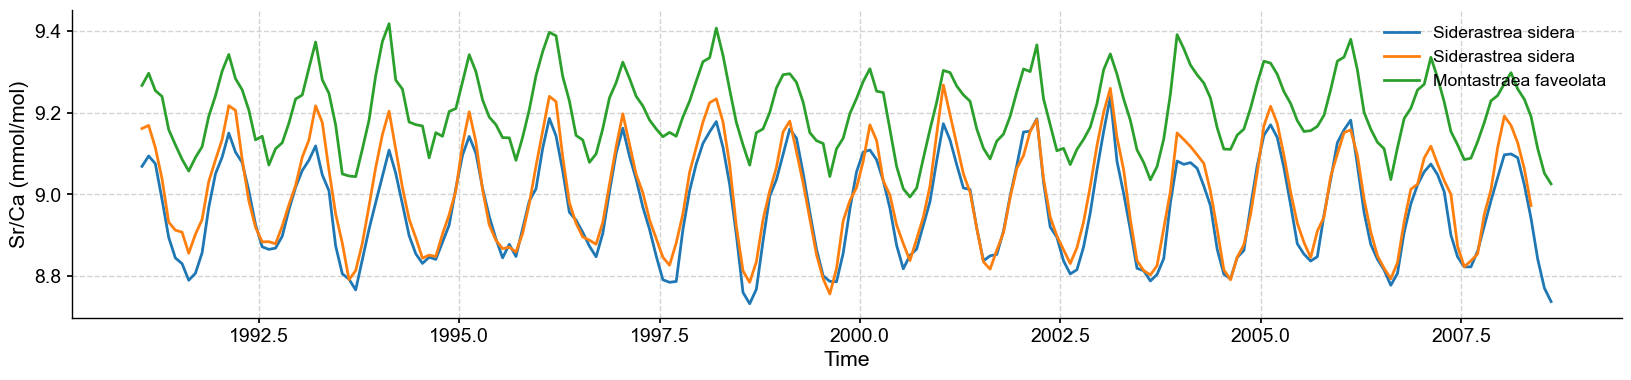

In [5]:
fig,ax=plt.subplots(figsize=(20,4))
plt.plot(df.iloc[:,0], df.iloc[:,1], label = "Siderastrea sidera")
plt.plot(df.iloc[:,0], df.iloc[:,4], label = "Siderastrea sidera")
plt.plot(df.iloc[:,0], df.iloc[:,7], label = "Montastraea faveolata")
plt.xlabel('Time')
plt.ylabel('Sr/Ca (mmol/mol)')
plt.legend()
plt.show()

Using Pyleoclim:

Text(0, 0.5, 'Sr/Ca (mmol/mol)')

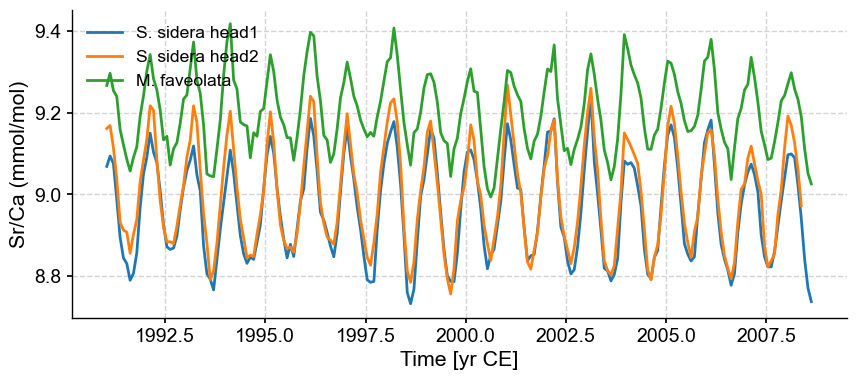

In [6]:
fig,ax = ts_ss_1.plot()
ts_ss_2.plot(ax=ax)
ts_mf.plot(ax=ax)
ax.set_ylabel('Sr/Ca (mmol/mol)')

Similarly for the instrumental data, the Matplotlib version is:

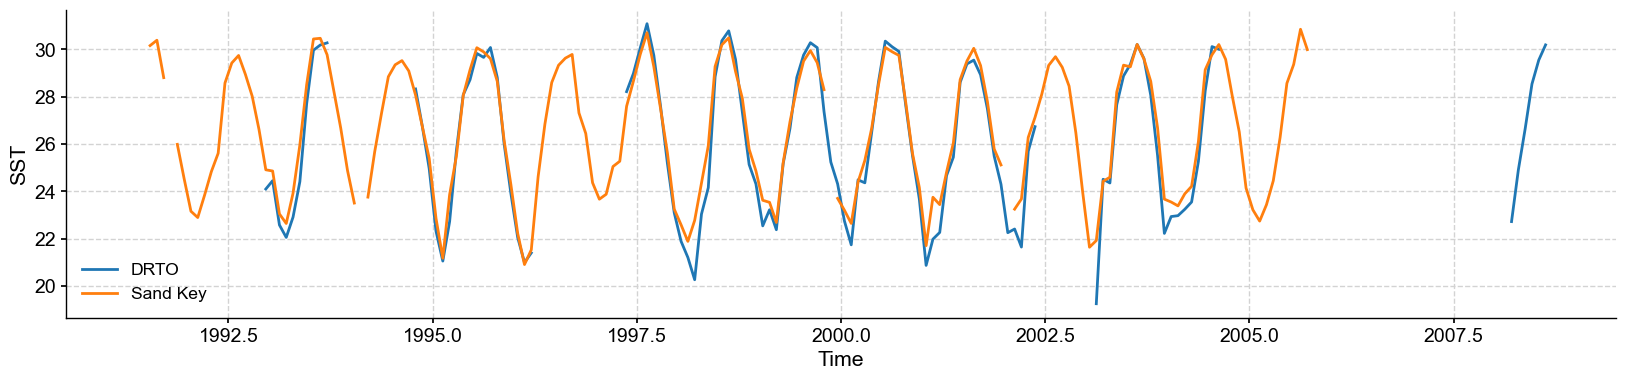

In [7]:
fig,ax=plt.subplots(figsize=(20,4))
plt.plot(df.iloc[:,0], df.iloc[:,10], label = "DRTO")
plt.plot(df.iloc[:,0], df.iloc[:,12], label = "Sand Key")
plt.xlabel('Time')
plt.ylabel('SST')
plt.legend()
plt.show()

Pyleoclim version

<AxesSubplot: xlabel='Time [yr CE]', ylabel='Sea Surface Temperature [$^\\circ$C]'>

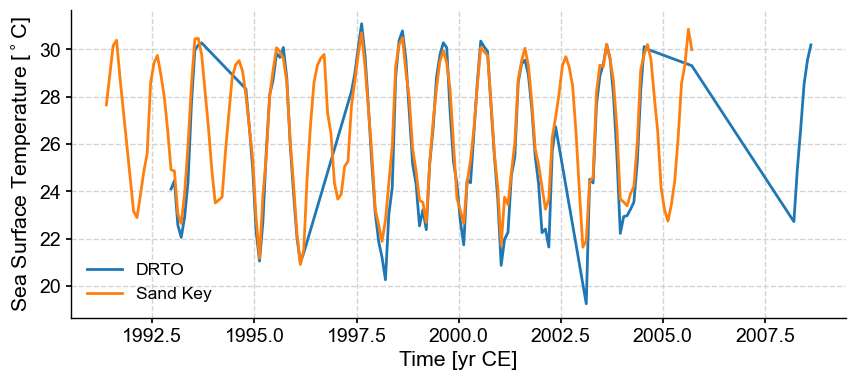

In [8]:
fig,ax = ts_drto.plot()
ts_sk.plot(ax=ax)

 Note: how should we prevent Pyleoclim from connecting the dots here?

## Analysis

Below are a few common analysis we can do easily with Pyleoclim. I'm using the first coral record as an example.

### Slicing

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Time [yr CE]', ylabel='S. sidera Sr/Ca [mmol/mol]'>)

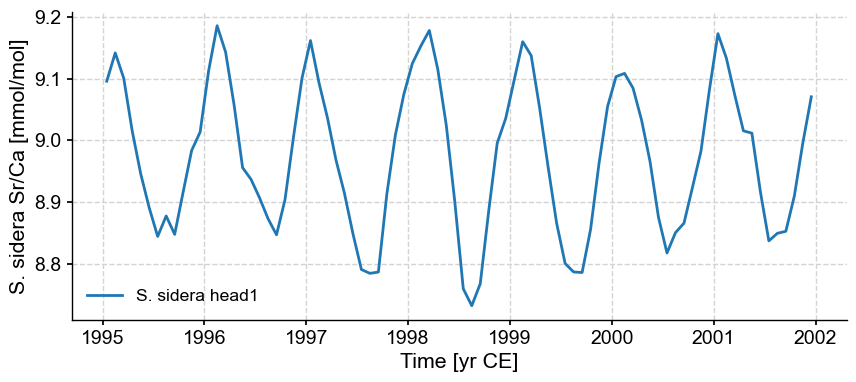

In [9]:
ts_slice = ts_ss_1.slice([1995,2002])
ts_slice.plot()

## Leveraging non-ns Pandas:

In [19]:
metadata = {'label':'Dry Tortugas [De Long et al, 2011]',
            'time_name':'time',
            'time_unit':'yr CE',
            'archiveType':'coral',
            'lat': 24.628588, 
            'lon':-82.873287}
ser = df.iloc[:,4].set_axis(df.iloc[:,0]) # extract S.S Sr/Ca

ts_ss_1b = pyleo.Series.from_pandas(ser,metadata)
ts_ss_1b

AttributeError: 'Float64Index' object has no attribute 'year'

JEG: opened an issue to address this in Pyleoclim : https://github.com/LinkedEarth/paleoPandas/issues/14

## Spectral Analysis

First, let's use MultiTaper analysis with an interpolations scheme to get evenly-spaced data and a significance test based on Monte-Carlo AR1

In [ ]:
psd_MTM = ts_ss_1.interp().standardize().spectral(method='mtm').signif_test(number=200)
psd_MTM.plot()

Not surprisingly, it has a pretty strong annual cycle. Let's use another method that doesn't require interpolation

In [ ]:
psd_LS = ts_ss_1.standardize().spectral(method='lomb_scargle').signif_test(number=200)
psd_LS.plot()